# Exercise: Clustering Algorithms with Scikit Learn
<img src="../Notebooks/IMG/sk-logo.png" width=200>

* ***SkLearn*** API Reference: https://scikit-learn.org/stable/modules/classes.html
* ***SkLearn*** Clustering Algorithms: https://scikit-learn.org/stable/modules/clustering.html#clustering

In [3]:
#setup env
import time
import warnings
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler

In [4]:
#helper calls
n_samples = 1500
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)

#generating Data Sets A-F
A = datasets.make_circles(n_samples=n_samples, factor=.5,noise=.05)[0]
B = datasets.make_moons(n_samples=n_samples, noise=.05)[0]
C = datasets.make_blobs(n_samples=n_samples, random_state=8)[0]
D = np.random.rand(n_samples, 2)
E = (X_aniso, y)[0]
F = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 2.5, 0.5],
                             random_state=random_state)[0]

## Exercise 1
Plot all raw data sets A-F in one figure.

Hints: use ```scatter``` plots and ```subfigures```.

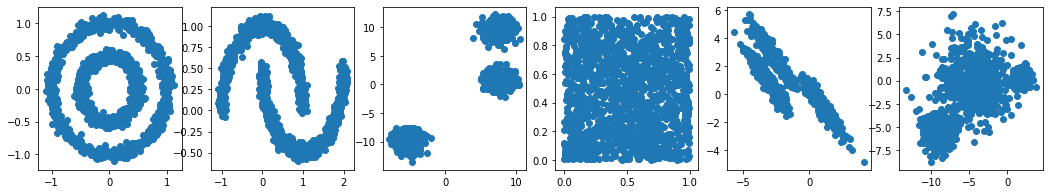

In [5]:
fig, axes = plt.subplots(1, 6,figsize=(18,3))
axes[0].scatter(A[:,0], A[:,1])
axes[1].scatter(B[:,0], B[:,1])
axes[2].scatter(C[:,0], C[:,1])
axes[3].scatter(D[:,0], D[:,1])
axes[4].scatter(E[:,0], E[:,1])
axes[5].scatter(F[:,0], F[:,1])

## Exercise 2
Perform ```K-Means``` clustering on all data sets: https://scikit-learn.org/stable/modules/clustering.html#k-means
* 2.1 plot all results
* 2.2 manually try to find the best $k$ for each data set (by visual evaluation)
* 2.3 Use the ```K-Means++``` initialization 

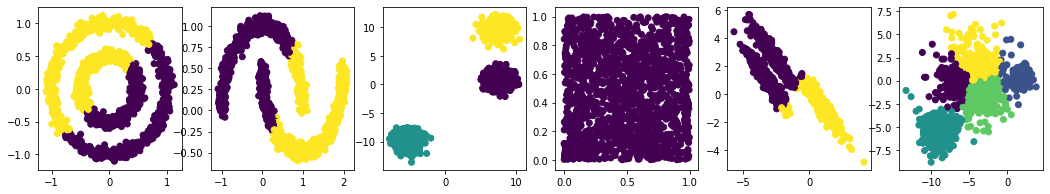

In [61]:
from sklearn.cluster import KMeans
kmeansA = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(A) # one for each ring, but doesn't work
kmeansB = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(B) # also 2 clusters visible
kmeansC = KMeans(n_clusters=3, init='k-means++', random_state=0).fit(C) # three clusters
kmeansD = KMeans(n_clusters=1, init='k-means++', random_state=0).fit(D) # no cluster visible
kmeansE = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(E) # looks like two or three
kmeansF = KMeans(n_clusters=5, init='k-means++', random_state=0).fit(F) # maybe also three or more

fig, axes = plt.subplots(1, 6,figsize=(18,3))
axes[0].scatter(A[:,0], A[:,1], c=kmeansA.labels_)
axes[1].scatter(B[:,0], B[:,1], c=kmeansB.labels_)
axes[2].scatter(C[:,0], C[:,1], c=kmeansC.labels_)
axes[3].scatter(D[:,0], D[:,1], c=kmeansD.labels_)
axes[4].scatter(E[:,0], E[:,1], c=kmeansE.labels_)
axes[5].scatter(F[:,0], F[:,1], c=kmeansF.labels_)

## Exercise 3
Performs ```DBSCAN``` clustering on all data sets and plot all results: https://scikit-learn.org/stable/modules/clustering.html#dbscan

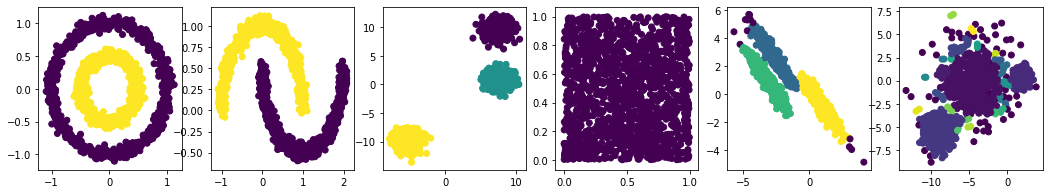

In [59]:
from sklearn.cluster import DBSCAN
dbA = DBSCAN(eps=0.2, min_samples=2).fit(A)
dbB = DBSCAN(eps=0.3, min_samples=2).fit(B)
dbC = DBSCAN(eps=1.5, min_samples=2).fit(C)
dbD = DBSCAN(eps=0.1, min_samples=2).fit(D)
dbE = DBSCAN(eps=0.35, min_samples=5).fit(E)
dbF = DBSCAN(eps=0.48, min_samples=2).fit(F)

fig, axes = plt.subplots(1, 6,figsize=(18,3))
axes[0].scatter(A[:,0], A[:,1], c=dbA.labels_)
axes[1].scatter(B[:,0], B[:,1], c=dbB.labels_)
axes[2].scatter(C[:,0], C[:,1], c=dbC.labels_)
axes[3].scatter(D[:,0], D[:,1], c=dbD.labels_)
axes[4].scatter(E[:,0], E[:,1], c=dbE.labels_)
axes[5].scatter(F[:,0], F[:,1], c=dbF.labels_)